# Analisis Rating Ramen

Sebuah project data analyst yang bertujuan untuk mengambil insight rating ramen berdasarkan feedback dari customer. Sumber dataset https://www.kaggle.com/datasets/residentmario/ramen-ratings.

## Analysis Point
1. Which packaging is the most produced?
2. How is ramen manufacturing internationally distributed?
3. What are the most favorite ramen in each country?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
ramen = pd.read_csv('ramen-ratings.csv')
ramen.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [5]:
ramen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [6]:
ramen.shape

(2580, 7)

In [7]:
ramen['Brand'].unique()

array(['New Touch', 'Just Way', 'Nissin', 'Wei Lih', "Ching's Secret",
       'Samyang Foods', 'Acecook', 'Ikeda Shoku', "Ripe'n'Dry", 'KOKA',
       'Tao Kae Noi', 'Yamachan', 'Nongshim', 'TRDP', 'Binh Tay', 'Paldo',
       'Jackpot Teriyaki', 'Yum-Mie', 'MyKuali', 'Ottogi',
       'Sichuan Guangyou', 'Lipton', 'Lele', 'Fujiwara', 'Uni-President',
       'Maruchan', 'Prima', 'Sokensha', 'Takamori', 'Guava Story',
       'Samurai Ramen', 'Ogasawara', 'Pringles', "Mom's Dry Noodle",
       'Maggi', 'Indomie', 'Happy Cook', 'The Ramen Rater Select', 'TTL',
       'E-Zee', 'Kiki Noodle', 'Tokyo Noodle', 'GGE', 'Myojo', 'Sau Tao',
       'Wang', 'Daifuku', 'Master Kong', "World O' Noodle", 'Kang Shi Fu',
       'Mum Ngon', 'Fashion Food', 'Dream Kitchen', 'Ajinatori',
       "Dr. McDougall's", 'Ve Wong', 'Super Bihun', 'Xiuhe',
       'Little Cook', 'Shirakiku', "Mama Pat's", 'Goku-Uma',
       'Sichuan Baijia', 'Liang Cheng Mai', 'Gefen', 'Hua Feng',
       'Pulmuone', 'Liu Quan', 'Daikok

In [8]:
ramen['Style'].unique()

array(['Cup', 'Pack', 'Tray', 'Bowl', 'Box', 'Can', 'Bar', nan],
      dtype=object)

In [9]:
ramen['Country'].unique()

array(['Japan', 'Taiwan', 'USA', 'India', 'South Korea', 'Singapore',
       'Thailand', 'Hong Kong', 'Vietnam', 'Ghana', 'Malaysia',
       'Indonesia', 'China', 'Nigeria', 'Germany', 'Hungary', 'Mexico',
       'Fiji', 'Australia', 'Pakistan', 'Bangladesh', 'Canada', 'Nepal',
       'Brazil', 'UK', 'Myanmar', 'Netherlands', 'United States',
       'Cambodia', 'Finland', 'Sarawak', 'Philippines', 'Sweden',
       'Colombia', 'Estonia', 'Holland', 'Poland', 'Dubai'], dtype=object)

## Data Validation (Duplicated)

In [13]:
ramen.duplicated().sum()

0

## Data Validation (Missing Values)

In [16]:
ramen.isna().sum()

Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          0
Top Ten     2539
dtype: int64

Terdapat 2 baris Missing valuse di kolom Style

In [17]:
ramen['Style'].unique()

array(['Cup', 'Pack', 'Tray', 'Bowl', 'Box', 'Can', 'Bar', nan],
      dtype=object)

In [28]:
modus_style = ramen['Style'].value_counts()
modus_style

Pack    1531
Bowl     481
Cup      450
Tray     108
Box        6
Can        1
Bar        1
Name: Style, dtype: int64

In [29]:
modus_style = ramen['Style'].mode().iloc[0]
modus_style

'Pack'

In [30]:
ramen['Style'].fillna(modus_style, inplace=True)

In [31]:
ramen.isna().sum()

Review #       0
Brand          0
Variety        0
Style          0
Country        0
Stars          0
Top Ten     2539
dtype: int64

Jadi, untuk mengatasi 2 baris missing values di kolom Style saya mengisinya dengan nilai modus (nilai yang paling sering muncul) yaitu "Pack"

In [33]:
ramen['Style'].unique()

array(['Cup', 'Pack', 'Tray', 'Bowl', 'Box', 'Can', 'Bar'], dtype=object)

## Data Validation (Top 10 Column)

In [34]:
ramen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2580 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [35]:
ramen = ramen.drop('Top Ten', axis=1)

In [36]:
ramen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2580 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
dtypes: int64(1), object(5)
memory usage: 121.1+ KB


Kolom "Top Ten" dihapus karena tidak diperlukan untuk menganalisis data

## Data Validation (Stars Column)

In [37]:
ramen['Stars'].unique()

array(['3.75', '1', '2.25', '2.75', '4.75', '4', '0.25', '2.5', '5',
       '4.25', '4.5', '3.5', 'Unrated', '1.5', '3.25', '2', '0', '3',
       '0.5', '4.00', '5.0', '3.50', '3.8', '4.3', '2.3', '5.00', '3.3',
       '4.0', '3.00', '1.75', '3.0', '4.50', '0.75', '1.25', '1.1', '2.1',
       '0.9', '3.1', '4.125', '3.125', '2.125', '2.9', '0.1', '2.8',
       '3.7', '3.4', '3.6', '2.85', '3.2', '3.65', '1.8'], dtype=object)

In [41]:
modus_stars = ramen['Stars'].value_counts()
modus_stars

4          384
5          369
3.75       350
3.5        326
3          173
3.25       170
4.25       143
4.5        132
2.75        85
2           68
2.5         67
4.75        64
1.5         37
1.75        27
1           26
0           26
2.25        21
0.5         14
0.25        11
1.25        10
5.0         10
3.50         9
5.00         7
4.00         6
4.3          4
3.8          3
4.0          3
4.50         3
Unrated      3
1.1          2
2.8          2
2.9          2
4.125        2
2.3          2
3.1          2
3.0          2
2.1          1
0.9          1
0.75         1
3.125        1
2.125        1
3.00         1
0.1          1
3.3          1
3.7          1
3.4          1
3.6          1
2.85         1
3.2          1
3.65         1
1.8          1
Name: Stars, dtype: int64

Terdapat nilai yang tidak terdefinisi "Unrated", untuk kasus ini saya asumsikan Unrated ini sebagai missing values dan akan diisi dengan nilai modus yaitu "4".

In [45]:
modus_stars = ramen['Stars'].mode().iloc[0]
modus_stars

'4'

In [46]:
ramen['Stars'] = ramen['Stars'].replace('Unrated', modus_stars)

In [47]:
ramen['Stars'].unique()

array(['3.75', '1', '2.25', '2.75', '4.75', '4', '0.25', '2.5', '5',
       '4.25', '4.5', '3.5', '1.5', '3.25', '2', '0', '3', '0.5', '4.00',
       '5.0', '3.50', '3.8', '4.3', '2.3', '5.00', '3.3', '4.0', '3.00',
       '1.75', '3.0', '4.50', '0.75', '1.25', '1.1', '2.1', '0.9', '3.1',
       '4.125', '3.125', '2.125', '2.9', '0.1', '2.8', '3.7', '3.4',
       '3.6', '2.85', '3.2', '3.65', '1.8'], dtype=object)

nilai "Unrated" sudah hilang.

## Data Validation (Type Data)

In [50]:
ramen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2580 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
dtypes: int64(1), object(5)
memory usage: 121.1+ KB


Kolom stars type datanya diubah menjadi float.

In [51]:
ramen['Stars'] = ramen['Stars'].astype(float)

In [52]:
ramen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  2580 non-null   int64  
 1   Brand     2580 non-null   object 
 2   Variety   2580 non-null   object 
 3   Style     2580 non-null   object 
 4   Country   2580 non-null   object 
 5   Stars     2580 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 121.1+ KB


## Data Insgiht

### 1.Which packaging is the most produced?

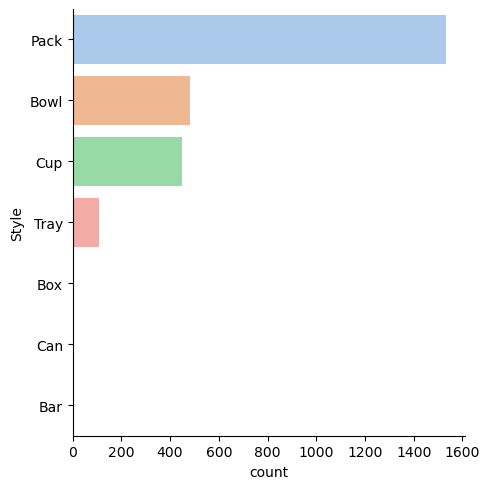

In [64]:
order = ramen['Style'].value_counts().index;
sns.catplot(data=ramen, y='Style', kind='count', palette='pastel', order=order)

### 2. How is ramen manufacturing internationally distributed?

In [73]:
ramen_negara = ramen['Country'].value_counts().sort_values(ascending=False).index

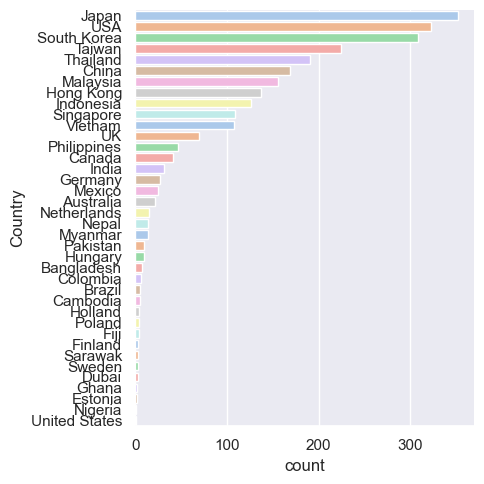

In [75]:
sns.catplot(data=ramen, y='Country', kind='count', palette='pastel', order=ramen_negara)

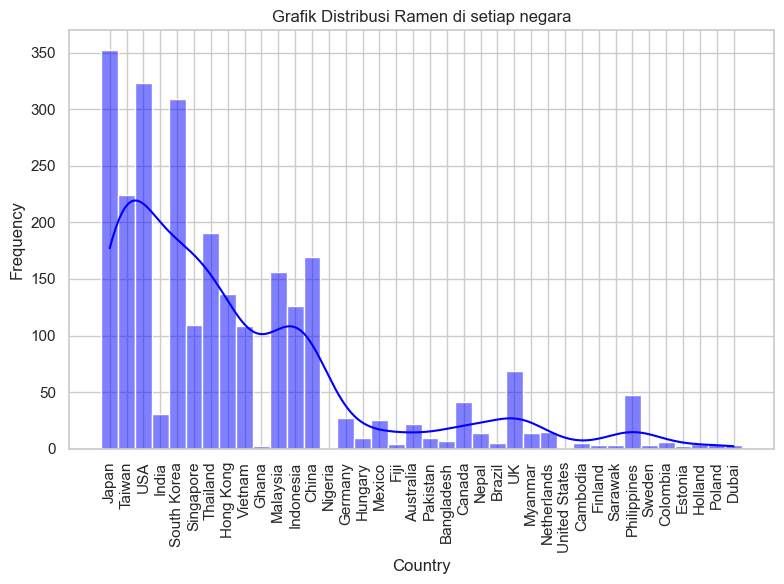

In [79]:
sns.set(style='whitegrid')
hist_plot = sns.histplot(data=ramen, x='Country', bins=20, kde=True, color='blue')
hist_plot.set(xlabel = "Country", ylabel = "Frequency")
plt.title("Grafik Distribusi Ramen di setiap negara")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 3. What are the most favorite ramen in each country?

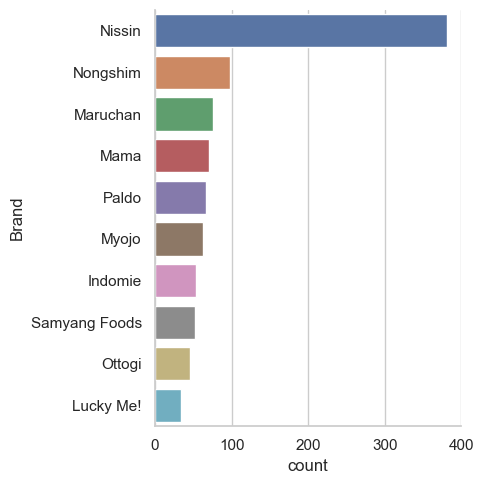

In [81]:
count_brand = ramen['Brand'].value_counts()

top_10_brands = count_brand.head(10);

top_10_ramen = ramen[ramen['Brand'].isin(top_10_brands.index)]

sns.catplot(data=top_10_ramen, y='Brand', kind='count', order=top_10_brands.index)

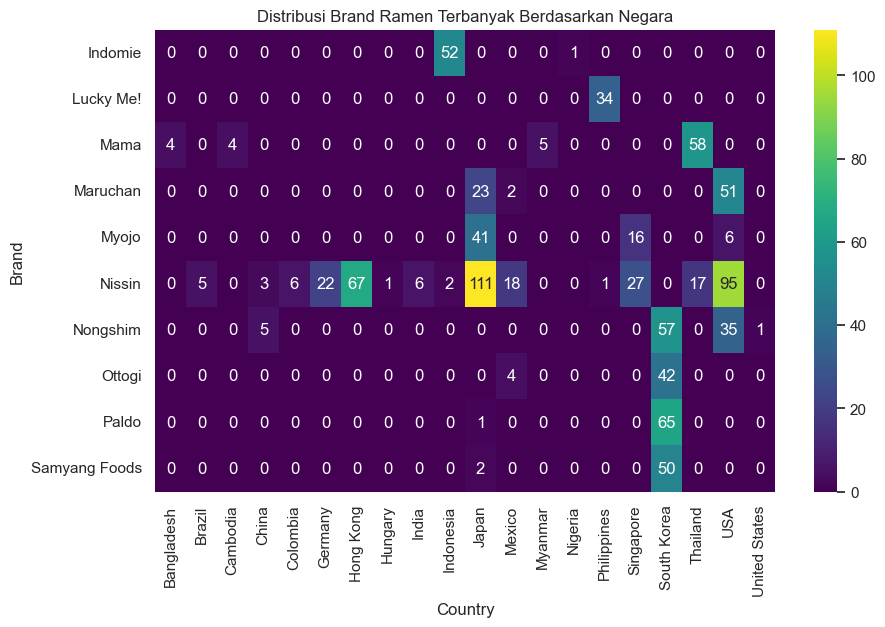

In [125]:
count_brand = ramen['Brand'].value_counts()
top_10_brands = count_brand.head(10).index

top_10_ramen = ramen[ramen['Brand'].isin(top_10_brands)]

# pivot table untuk menghitung jumlah kemunculan brand per negara
pivot_table = top_10_ramen.pivot_table(index='Brand', columns='Country', values='Review #', aggfunc='count', fill_value=0)

# Membuat heatmap
plt.figure(figsize=(10, 6))  # Mengatur ukuran gambar
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='viridis')


plt.xlabel('Country')
plt.ylabel('Brand')

plt.title('Distribusi Brand Ramen Terbanyak Berdasarkan Negara')
plt.show()

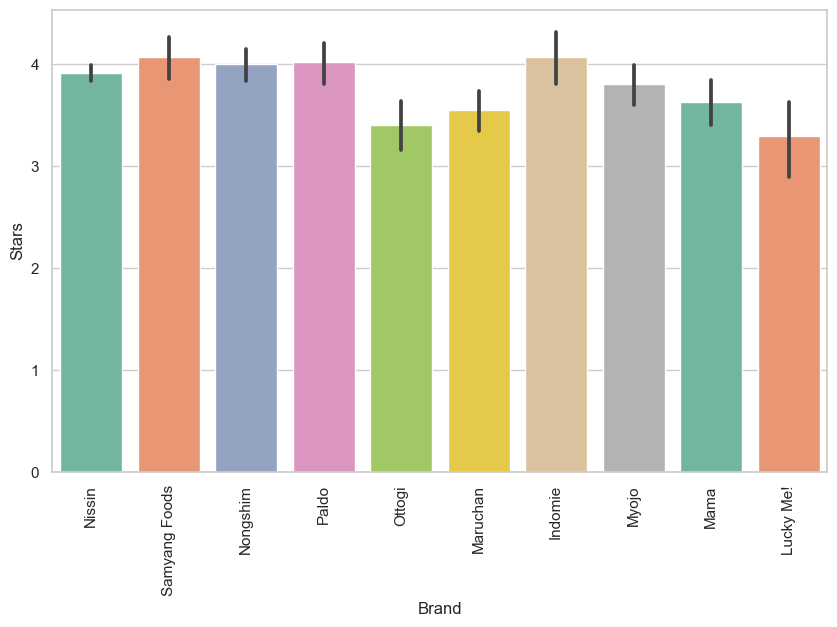

In [124]:
top_10_brands = ramen['Brand'].value_counts().head(10).index

top_10_ramen = ramen[ramen['Brand'].isin(top_10_brands)]

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_ramen, x='Brand', y='Stars', palette='Set2')

plt.xlabel('Brand')
plt.ylabel('Stars')

plt.xticks(rotation=90)
plt.show()

## Conclusion

1. Diantara 8 jenis kemasan ramen yang ada, kemasan Pack adalah kemasan yang paling banyak diproduksi.
2. Negara yang paling banyak memasok ramen adalah Jepang dengan brand ramen Nissin.
3. Diantara 355 brand mie/ramen yang beredar dipasaran, brand Indomie asal indonesia menduduki peringkat ke-8 sebagai brand mie yang paling banyak beredar dipasaran.
4. Brand Indomie menempati posisi teratas sebagai brand ramen/mie yang memiliki jumlah rating tertinggi dibandingkan brand-brand yang lain.
5. Brand Nissin adalah brand ramen asal Asia yang paling banyak di distribusi di negara bagian Eropa.